In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
from torch import nn
import numpy as np
from einops import repeat, reduce, rearrange
import matplotlib.pyplot as plt

import main
import models


In [3]:
net = models.CompressionGPT(32, 32, 32, 4, 4)

AttributeError: module 'models' has no attribute 'CompressionGPT'

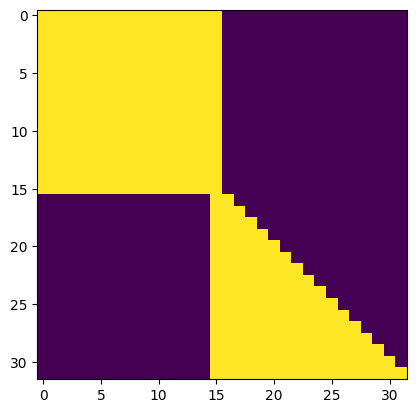

In [41]:
plt.imshow(net.mask)

In [45]:
mha = nn.MultiheadAttention(32, 4, batch_first=True)

In [133]:
x = torch.randn(16, 20, 32)
q = torch.randn(16, 10, 32)
mask = torch.triu(torch.ones(16, 4, 10, 20, dtype=torch.bool), diagonal=1).reshape(64, 10, 20)
mha(q, x, x, attn_mask=mask)[0].shape

torch.Size([16, 10, 32])

torch.Size([16, 32])


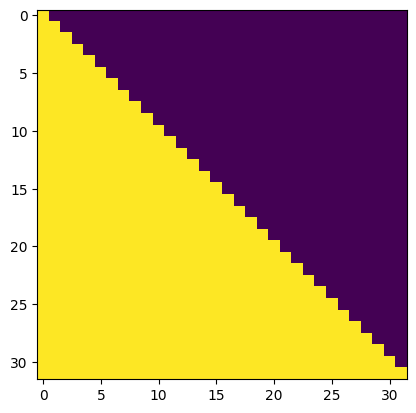

In [154]:
net = models.GPT(32, 32, 32, 4, 4)
tok = torch.randint(0, 32, size=(16, 33))
print(net.loss_fn(tok).shape)
plt.imshow(net.blocks[0].mask)

torch.Size([16, 16])


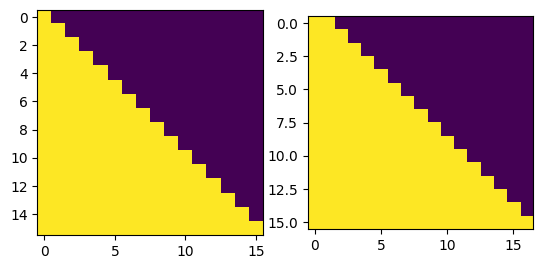

In [157]:
net = models.Compression2AK(32, 32, 32, 4, 4)
tok = torch.randint(0, 32, size=(16, 33))
print(net.loss_fn(tok, i=16).shape)
plt.subplot(121); plt.imshow(net.encoder.blocks[3].mask)
plt.subplot(122); plt.imshow(net.decoder.blocks[3].mask)

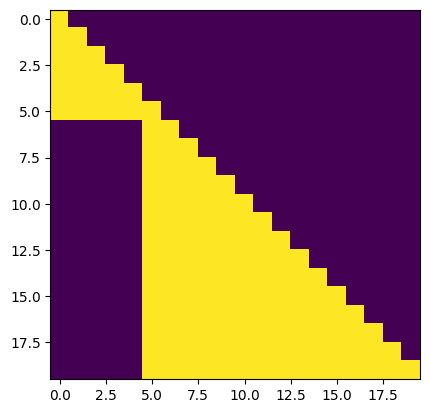

In [218]:
import matplotlib.pyplot as plt
import torch

block_size = 20
mask = torch.tril(torch.ones(block_size, block_size, dtype=torch.bool))
idx_dec = np.random.randint(0, block_size)
mask[idx_dec:, :idx_dec] = False
mask[idx_dec:, np.clip(idx_dec-1, 0, None)] = True
plt.imshow(mask)
plt.show()

In [75]:
vocab_size = 32
block_size = 20
n_embd = 48

bs = 32

net = models.CompressionGPT(vocab_size, block_size, n_embd, 4, 4)

In [76]:
tok = torch.randint(0, vocab_size, size=(bs, block_size))
logits = net(tok)

In [77]:
net.idxs_dec

tensor([ 5,  3, 19,  4,  4, 11,  3,  2, 13,  3, 19, 17, 18, 16,  7, 12,  2,  4,
         5, 16, 10,  9,  8,  3,  2,  5,  9,  5,  2,  2,  4, 18])

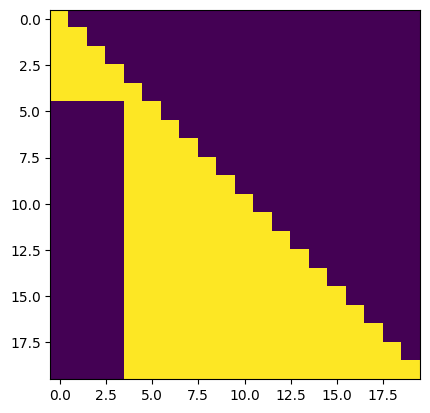

In [78]:
plt.imshow(net.blocks[2].mask.reshape(32, 4, 20, 20)[0, 0])